In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
import pandas as pd


plt.style.use('fivethirtyeight')

In [7]:
try:
    gdp_india = pd.read_csv('/Users/subhamrath/Documents/india_data/data/gdp_india_wb.csv')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

In [10]:
import pandas as pd
from pandas import DataFrame
from typing import Dict

def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans and formats indicators data.

    Args:
        data (DataFrame): Input DataFrame containing indicator data.

    Returns:
        DataFrame: Cleaned and formatted DataFrame.
    """
    df_filtered = data.iloc[:1, 2:]
    df_filtered = df_filtered[['Country Name', '2004 [YR2004]',
                               '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]',
                               '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
                               '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
                               '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
                               '2021 [YR2021]', '2022 [YR2022]']]
    df_filtered.columns = ['Country', '2004',
                           '2005', '2006', '2007', '2008',
                           '2009', '2010', '2011', '2012',
                           '2013', '2014', '2015', '2016',
                           '2017', '2018', '2019', '2020',
                           '2021', '2022']
    return df_filtered.set_index('Country')



In [20]:
gdp_info_df = clean_data(gdp_india)
gdp_info_df.columns = [int(i) for i in gdp_info_df.columns]

In [21]:

mms_start_index = '2004'  # Replace with the actual start index value
mms_end_index = '2014'    # Replace with the actual end index value

mms_data = gdp_info_df.T.loc[mms_start_index:mms_end_index]

nm_start_index = '2014'  # Replace with the actual start index value
nm_end_index = '2022'    # Replace with the actual end index value

nm_data = gdp_info_df.T.loc[nm_start_index:nm_end_index]

<AxesSubplot:>

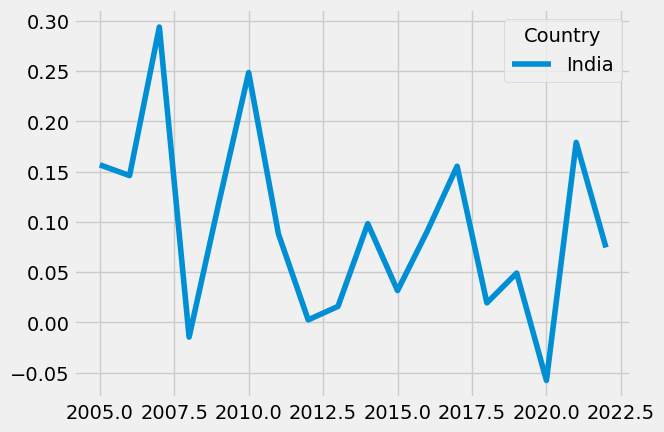

In [22]:
gdp_info_df.T.pct_change().plot()

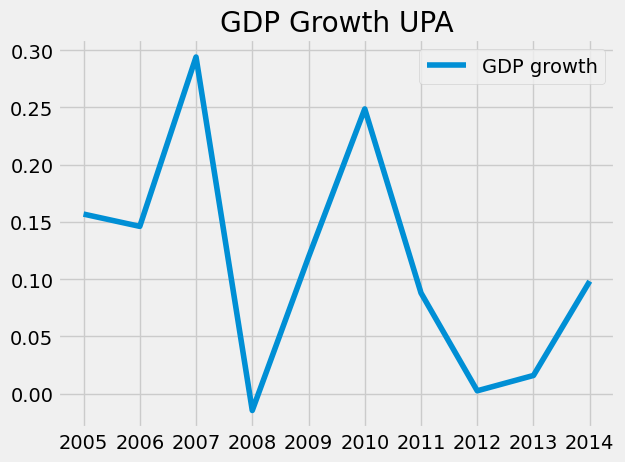

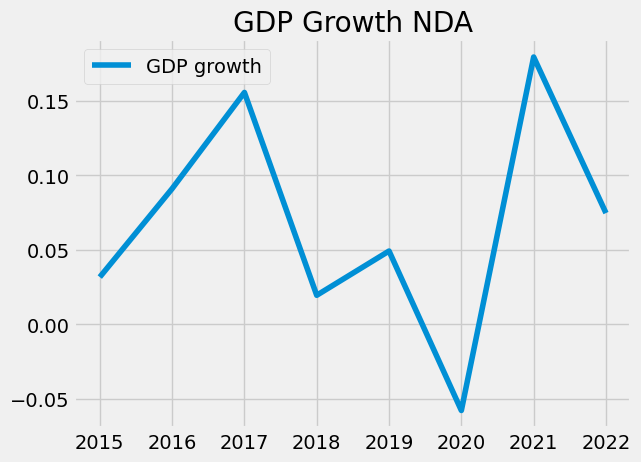

In [14]:
mms_gdp_growth = mms_data.pct_change()[1:]
nm_gdp_growth = nm_data.pct_change()[1:]
plt.plot(mms_gdp_growth,label = 'GDP growth')
plt.title('GDP Growth UPA')
plt.legend()
plt.savefig('GDP_growth_rate_UPA.png')
plt.show()
plt.plot(nm_gdp_growth ,label = 'GDP growth')
plt.title('GDP Growth NDA')
plt.legend()
plt.savefig('GDP_growth_rate_NDA.png')
plt.show()

In [18]:
# Define a function to format y-axis labels
def millions_billions_trillions(x, pos):
    if x >= 1e12:
        return f'{x / 1e12:.1f}T'
    elif x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'
    else:
        return f'{x:.0f}'

In [19]:
final_value = mms_data.iloc[0].values[0]
initial_year = 2004
final_value_list = [final_value]
for rate in nm_gdp_growth.values.tolist():
    initial_year+= 1
    final_value = final_value * (1.0 + rate[0])
    final_value_list.append(final_value)

print("Final Value:", final_value, 'at year', initial_year, 'with NDA growth rate')
print("Actual Value:", mms_data.loc[2012], 'at year', initial_year)

mms_year_list = [(2004+i) for i in range(len(final_value_list))]
simulated_gdp = pd.DataFrame({key:val for key, val in zip(mms_year_list, final_value_list)}, index = ['GDP']).T

nm_final_value = nm_data.iloc[0].values[0]
nm_initial_year = 2014
nm_final_value_list = [nm_final_value]
for rate in mms_gdp_growth.values.tolist():
    nm_initial_year+= 1
    nm_final_value = nm_final_value * (1.0 + rate[0])
    nm_final_value_list.append(nm_final_value)

nm_year_list = [(2014+i) for i in range(len(nm_final_value_list))]
nm_simulated_gdp = pd.DataFrame({key:val for key, val in zip(nm_year_list, nm_final_value_list)}, index = ['GDP']).T

Final Value: 1177235202237.3115 at year 2012 with NDA growth rate


KeyError: 2012

GDP    0.552483
Name: 2012, dtype: float64
GDP   -0.355871
Name: 2022, dtype: float64


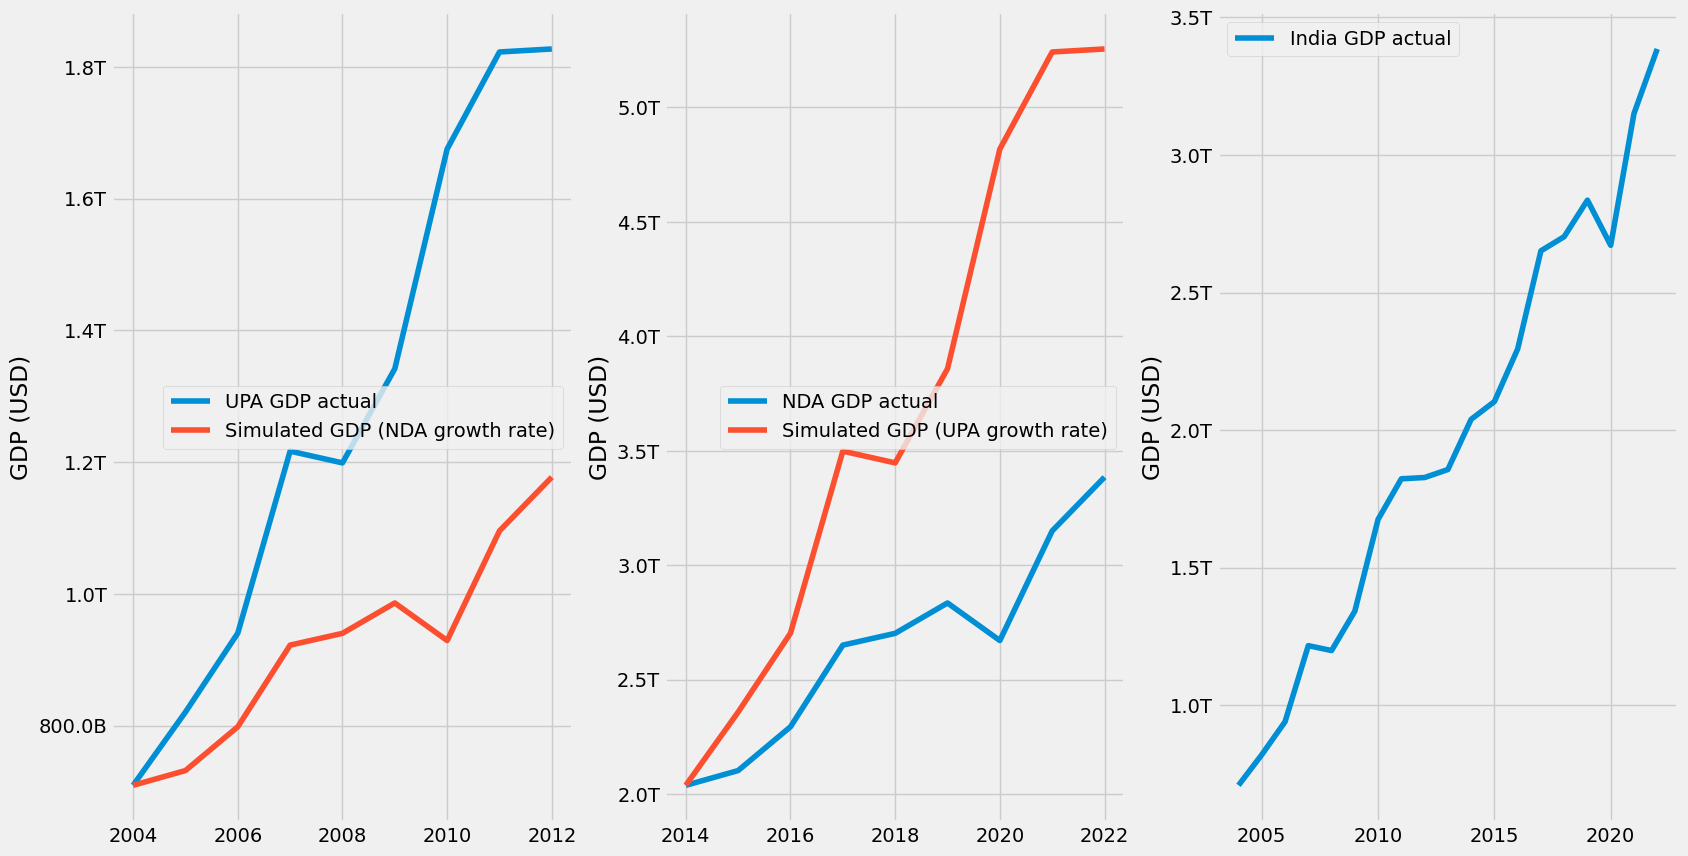

In [30]:
plt.figure(figsize = (18,10))
plt.subplot(1,3,1)
plt.plot(mms_data[:-2], label = 'UPA GDP actual')
print((mms_data.iloc[-3]-simulated_gdp.iloc[-1])/simulated_gdp.iloc[-1])
plt.plot(simulated_gdp, label = 'Simulated GDP (NDA growth rate)')
plt.legend()
plt.ylabel('GDP (USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_billions_trillions))
plt.subplot(1,3,2)
plt.plot(nm_data, label = 'NDA GDP actual')
plt.plot(nm_simulated_gdp.iloc[:-2], label = 'Simulated GDP (UPA growth rate)')
plt.legend()
plt.ylabel('GDP (USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_billions_trillions))
plt.subplot(1,3,3)
plt.plot(gdp_info_df.loc[2004:2022], label = 'India GDP actual')
plt.ylabel('GDP (USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_billions_trillions))
plt.legend()
print((nm_data.iloc[-1]-nm_simulated_gdp.iloc[-3])/nm_simulated_gdp.iloc[-3])

plt.savefig('GDP_simulated_GDP.png')
plt.show()

/Users/subhamrath/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Expected GDP at the end of 2022, 3.84 T USD


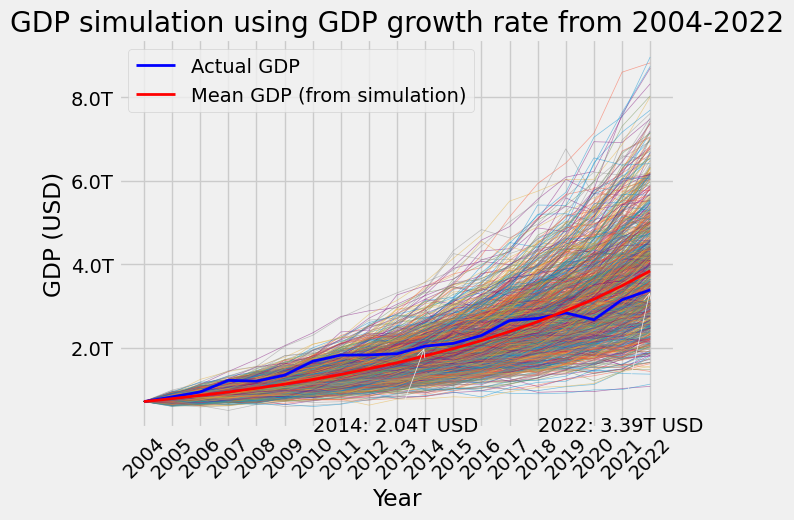

<Figure size 640x480 with 0 Axes>

In [31]:

def generate_growth_rates(gdp_info_df: pd.DataFrame, parametric_flag: bool) -> tuple:
    """
    Generate GDP growth rates for simulations.
    
    Args:
        gdp_info_df (pd.DataFrame): DataFrame containing GDP data.
        parametric_flag : If true, montecarlo parametric resampling else bootstrap.
        
    Returns:
        tuple: Tuple containing initial_value (float) and growth_rates (numpy.ndarray).
    """
    # Parameters
    initial_value = gdp_info_df.loc[2004]
    gdp_info_df_growth_2004_2022 = gdp_info_df.pct_change()[1:].loc[2004:20022].values
    mean_growth_rate = np.mean(gdp_info_df.pct_change().loc[2004:20022])
    std_deviation = np.std(gdp_info_df.pct_change().loc[2004:20022].values)
    num_simulations = 1000
    num_steps = len(gdp_info_df.loc[2005:2022])
    
    # Generate growth rates using Gaussian distribution
    np.random.seed(42)
    if parametric_flag:
        growth_rates = np.random.normal(mean_growth_rate, std_deviation, (num_simulations, num_steps))
    else:
        # Extract values
        growth_list = [i[0] for i in gdp_info_df_growth_2004_2022]
        growth_rates = np.random.choice(growth_list,  size=(num_simulations, num_steps), replace=True)
    
    return initial_value, growth_rates

def calculate_simulations(initial_value: float, growth_rates: np.ndarray) -> tuple:
    """
    Calculate GDP simulations based on growth rates.
    
    Args:
        initial_value (float): Initial GDP value.
        growth_rates (numpy.ndarray): Array of GDP growth rates.
        
    Returns:
        tuple: Tuple containing years (numpy.ndarray) and simulations (numpy.ndarray).
    """
    num_simulations, num_steps = growth_rates.shape
    
    # Calculate realizations using growth rates
    simulations = np.zeros((num_simulations, num_steps + 1))
    simulations[:, 0] = initial_value
    years = np.arange(2004, 2023)
    
    for i in range(1, num_steps+1):
        simulations[:, i] = simulations[:, i - 1] * (1 + growth_rates[:, i - 1])
    
    return years, simulations

def plot_simulations(gdp_info: pd.DataFrame, years: np.ndarray, simulations: np.ndarray) -> None:
    """
    Plot GDP simulations.
    
    Args:
        gdp_info: GDP dataframe information.
        years (numpy.ndarray): Array of years.
        simulations (numpy.ndarray): Array of GDP simulations.
        
    Returns:
        None
    """
    # Plot all realizations
    for realization in simulations:
        plt.plot(years, realization, linewidth=0.5, alpha=0.5)
    
    # Plot actual realization and mean realization in bold lines
    actual_realization = [i[0] for i in gdp_info_df.loc[2004:20022].values]
    mean_realization = np.mean(simulations, axis=0)
    print(f'Expected GDP at the end of 2022, {round(mean_realization[-1]/1e12,2)} T USD')
    plt.plot(years, actual_realization, color='blue', linewidth=2, label='Actual GDP')
    plt.plot(years, mean_realization, color='red', linewidth=2, label='Mean GDP (from simulation)')
    
    # Annotate points
    plt.annotate(f'2014: {round(actual_realization[10]/1e12,2)}T USD', xy=(2014, actual_realization[10]), xytext=(2010, 3000),
                 arrowprops=dict(arrowstyle='->'))
    plt.annotate(f'2022: {round(actual_realization[-1]/1e12,2)}T USD', xy=(2022, actual_realization[-1]), xytext=(2018, 14000),
                 arrowprops=dict(arrowstyle='->'))

    
    # Customize the plot
    plt.legend()
    plt.title('GDP simulation using GDP growth rate from 2004-2022')
    plt.xlabel('Year')
    plt.ylabel('GDP (USD)')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_billions_trillions))
    plt.xticks(years, rotation=45)
    plt.grid(True)
    plt.show()

initial_value, growth_rates = generate_growth_rates(gdp_info_df, True)
years, simulations = calculate_simulations(initial_value, growth_rates)
plot_simulations(gdp_info_df,years, simulations)
plt.savefig('GDP_simulation_montecarlo.png')
plt.show()

Expected GDP at the end of 2022, 3.77 T USD


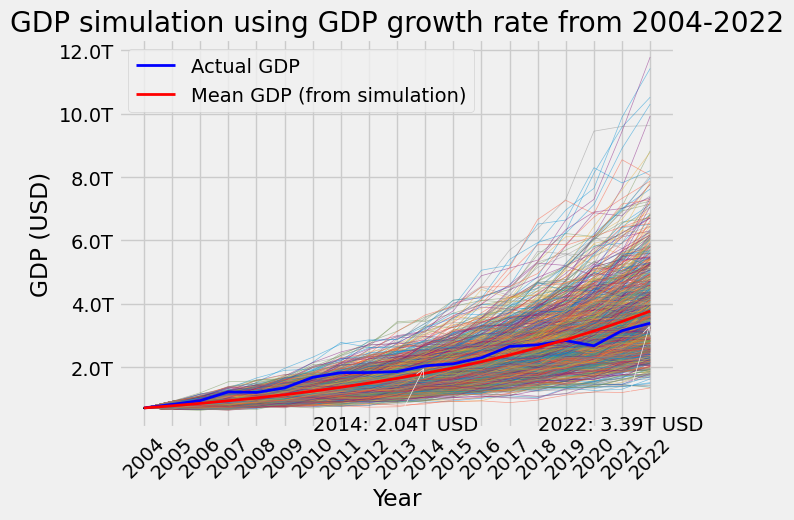

<Figure size 640x480 with 0 Axes>

In [143]:
initial_value, growth_rates = generate_growth_rates(gdp_info_df, False)
years, simulations = calculate_simulations(initial_value, growth_rates)
plot_simulations(gdp_info_df,years, simulations)
plt.savefig('GDP_simulation_bootstrap.png')
plt.show()

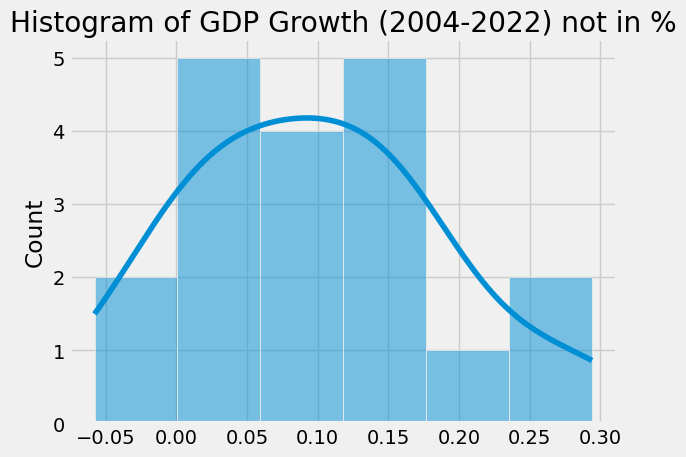

In [148]:
sns.histplot(change_list, kde=True)
plt.title('Histogram of GDP Growth (2004-2022) not in %')
plt.tight_layout()
plt.savefig('GDP_growth_histplot.png')
plt.show()

In [32]:
import numpy as np

# Define your two lists of returns (A and B)
returns_A = nm_data.pct_change()[1:]['GDP']
returns_B = mms_data.pct_change()[1:]['GDP']

# Define the number of bootstrap samples and iterations
num_samples = 10000
alpha = 0.05  # Significance level

# Combine the returns from both datasets
combined_returns = np.concatenate((returns_A, returns_B))

# Compute the observed difference in means
observed_difference = np.mean(returns_A) - np.mean(returns_B)

# Create an array to store the bootstrapped differences
bootstrapped_differences = []

for _ in range(num_samples):
    # Resample with replacement from the combined dataset
    bootstrap_sample = np.random.choice(combined_returns, size=len(combined_returns), replace=True)

    # Split the bootstrapped sample into two parts
    bootstrap_sample_A = bootstrap_sample[:len(returns_A)]
    bootstrap_sample_B = bootstrap_sample[len(returns_A):]
    
    # Calculate the difference in means for the bootstrap sample
    bootstrap_difference = np.mean(bootstrap_sample_A) - np.mean(bootstrap_sample_B)
    
    bootstrapped_differences.append(bootstrap_difference)

# Calculate the p-value
p_value = (np.sum(np.array(bootstrapped_differences) >= observed_difference) + 1) / (num_samples + 1)

# Print the results
print("Observed Difference in Means:", observed_difference)
print("Bootstrap p-value:", p_value)

# Test the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: Mean return of A is better than B.")
else:
    print("Fail to reject the null hypothesis: Mean return of A is not better than B.")


Observed Difference in Means: -0.04771091752525973
Bootstrap p-value: 0.8737126287371263
Fail to reject the null hypothesis: Mean return of A is not better than B.
